# Chapter 11. Monsters and mixtures

In [2]:
import numpy as np
import pandas as pd
import pymc3 as pm
from pymc3.glm import GLM
import arviz as az
import rethinking
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import theano

## Exercises 11E1-11E4

In [ ]:
# 11E1. Ordered means there is a natural ordering between symbols, e.g. a Likert scale
# 11E2. For ordered variables the link function operates on the cumulative probabilities.
# 11E3. Underestimation of the effect when present
# 11E4. 

## Exercises 11M1-11M3

In [ ]:
# 11M1, 11M2, 11M3.

## Exercises 11H1-11H4

In [13]:
df = pd.read_csv("../external/rethinking/data/Hurricanes.csv", sep=";")
print(f"The data contains {len(df)} samples")
display(df.head())
display(df.groupby("female").count())

The data contains 92 samples


,name,year,deaths,category,min_pressure,damage_norm,female,femininity
0,Easy,1950,2,3,960,1590,1,6.77778
1,King,1950,4,3,955,5350,0,1.38889
2,Able,1952,3,1,985,150,0,3.83333
3,Barbara,1953,1,1,987,58,1,9.83333
4,Florence,1953,0,1,985,15,1,8.33333


,name,year,deaths,category,min_pressure,damage_norm,femininity
female,,,,,,,
0,30,30,30,30,30,30,30
1,62,62,62,62,62,62,62


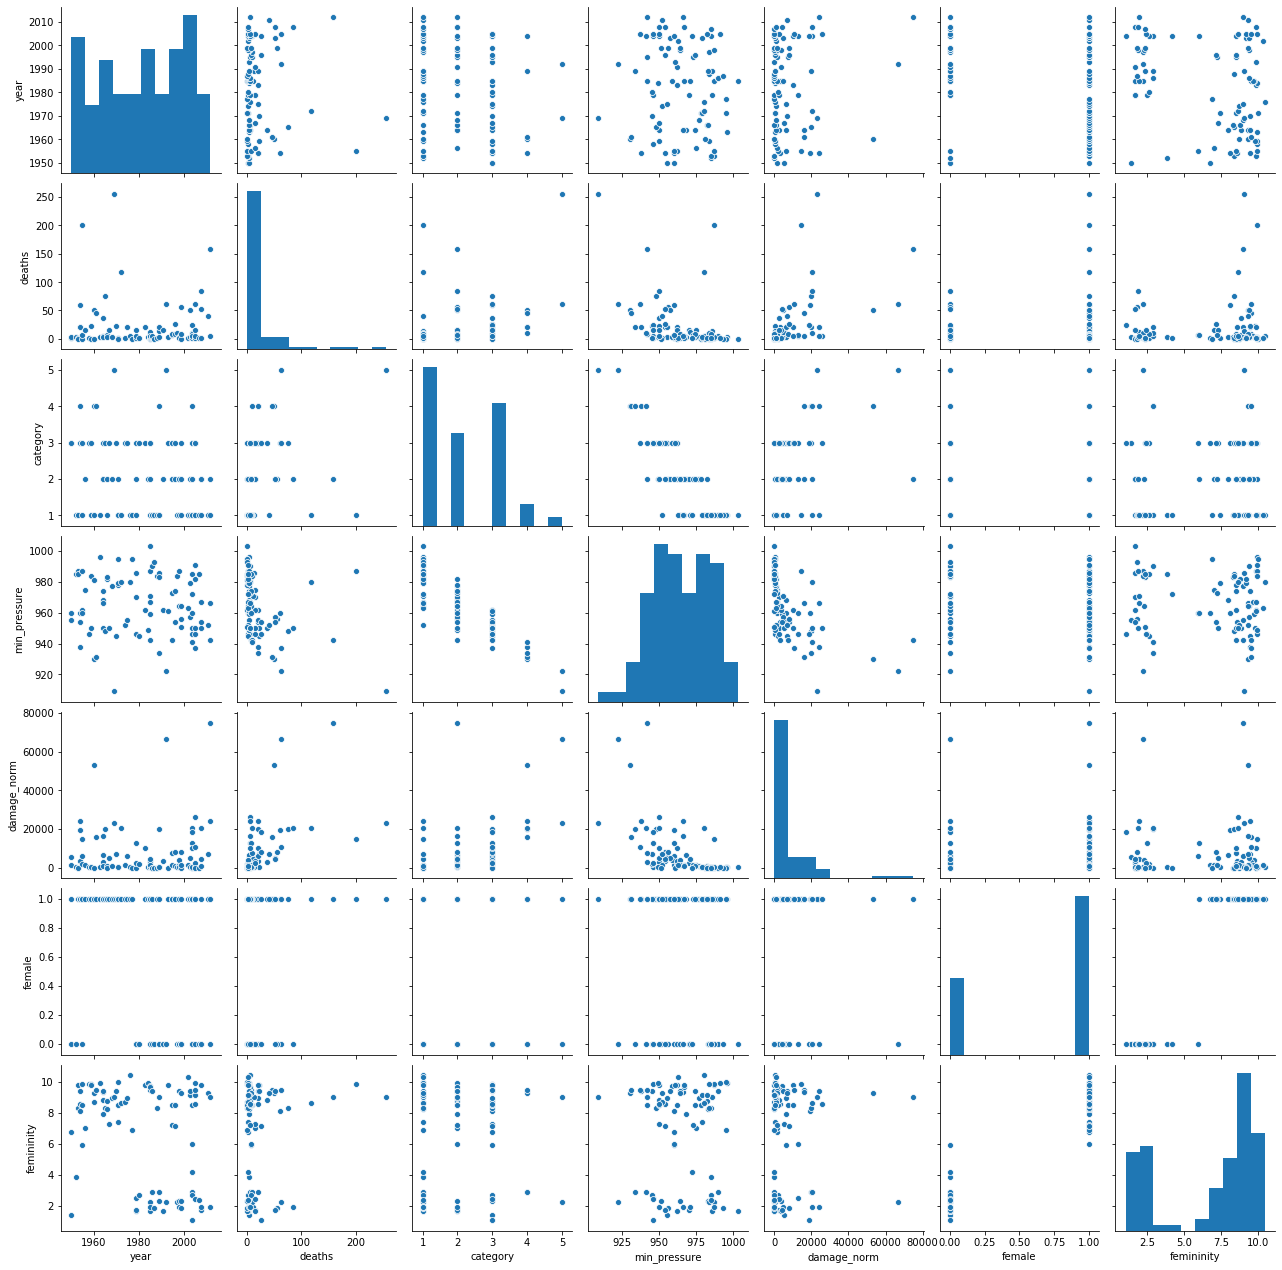

In [12]:
sns.pairplot(df);

20.652173913043477


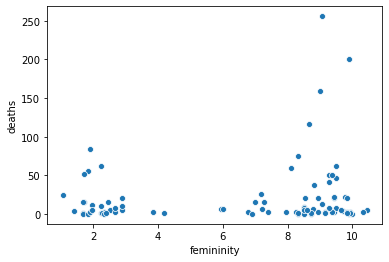

In [25]:
sns.scatterplot(x="femininity", y="deaths", data=df);
print(df["deaths"].mean())

In [28]:
deaths = df["deaths"].values
femininity = df["femininity"].values
x = theano.shared(femininity)

models = []

with pm.Model() as model:
    α = pm.Normal("α", 0, 100)
    λ = pm.math.exp(α) 
    y = pm.Poisson("y", mu=λ, observed=deaths)
models.append(model)

with pm.Model() as model:
    α = pm.Normal("α", 0, 100)
    β = pm.Normal("β", 0, 10)
    λ = pm.math.exp(α + β * x) 
    y = pm.Poisson("y", mu=λ, observed=deaths)
models.append(model)

In [29]:
traces = []
kwargs = {"draws": 4000, "target_accept": 0.8, "tune": 1000}
for m in models:
    traces.append(pm.sample(model=m, **kwargs))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:03<00:00, 6246.02draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:05<00:00, 3707.98draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [30]:
for t in traces:
    display(az.summary(t))

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,3.028,0.023,2.986,3.071,0.0,0.0,6799.0,6798.0,6774.0,11078.0,1.0


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,2.498,0.065,2.375,2.617,0.001,0.001,3437.0,3436.0,3407.0,3669.0,1.0
β,0.074,0.008,0.059,0.089,0.000,0.000,3469.0,3439.0,3432.0,3460.0,1.0


In [31]:
rethinking.compare({f"model{i+1}": t for (i, t) in enumerate(traces)}) 

/home/bart/.pyenv/versions/anaconda3-5.3.1/envs/statistical-rethinking/lib/python3.8/site-packages/arviz/stats/stats.py:1208: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,waic,p_waic,dwaic,weights
model2,-2206.457883,131.772699,0.0000,NaN
model1,-2217.196983,77.994689,10.7391,NaN


In [27]:
print(np.exp(t["α"]).mean())

20.65801431956315
